Feature Exploration: Cabin and Embarked
=======================================

So far, the developed models have focused on age, sex, fare, pclass. The model has not yet looked at where the passengers left from (embarked), or where they stayed on the ship (Cabin). Thie notebook explores both of those features, to see how they impact analysis of survivability.

In [1]:
# set up code and dataframe with training data
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.metrics as ms
import sklearn.model_selection as mds
import sklearn.tree as tr

datestamp = "20250224.204235"
df_ = pd.read_csv(f"../data/kaggle/train.clean.{datestamp}.csv")
print(df_[["Embarked", "Cabin"]].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Embarked  889 non-null    object
 1   Cabin     204 non-null    object
dtypes: object(2)
memory usage: 14.1+ KB
None


# Chart Embarked Values

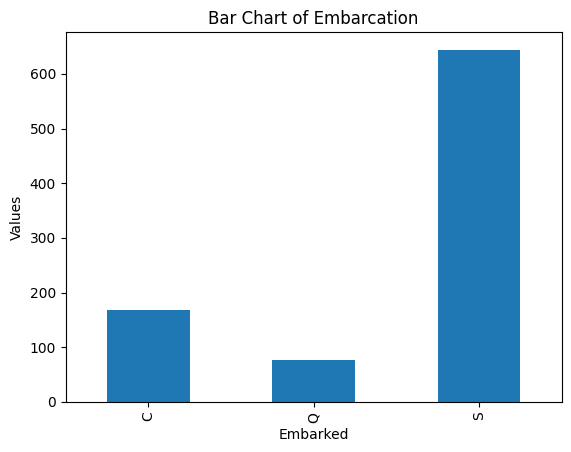

In [2]:
x_colname = 'Embarked'

df_group_count = df_.groupby(['Embarked'])['Embarked'].count()
df_group_count.plot.bar(title='Bar Chart of Embarcation')
plt.xlabel('Embarked')
plt.ylabel('Values')
plt.show()

## Chart Survival Rate by Embarkment

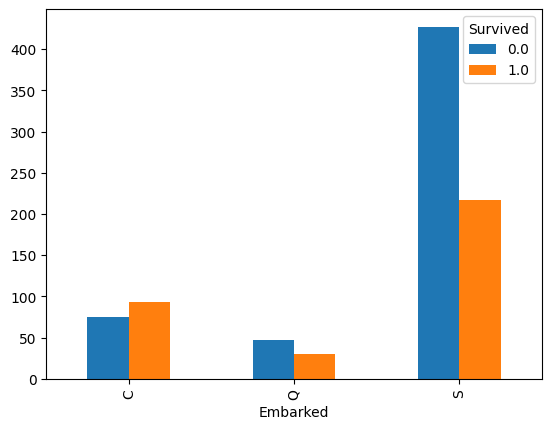

In [3]:
# set up the X, y values for the train and test sets
x_colname = 'Embarked'
y_colname = 'Survived'

# transform the dataframe, so that it can be properly graphed as a bar plot
df_group_count = df_.groupby([x_colname, y_colname])[x_colname].count()
df_pclass_grouped = df_group_count.unstack(y_colname)
df_pclass_grouped.plot(kind='bar')
plt.show()

## Chart Pclass Rate by Embarkment

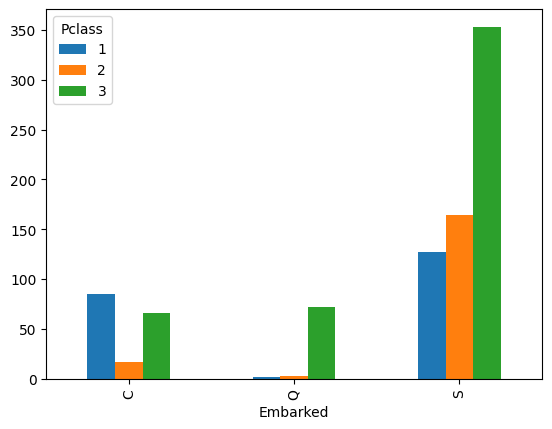

In [4]:
# set up the X, y values for the train and test sets
x_colname = 'Embarked'
y_colname = 'Pclass'

# transform the dataframe, so that it can be properly graphed as a bar plot
df_group_count = df_.groupby([x_colname, y_colname])[x_colname].count()
df_pclass_grouped = df_group_count.unstack(y_colname)
df_pclass_grouped.plot(kind='bar')
plt.show()

# Analyze Cabin Values

# Who had cabins?

Anecdotally, we might assume that only first class passengers had cabins. Let's check that assumption by looking at passengers in 2nd and 3rd class.

In [5]:
df_2nd_3rd_class = df_[ df_["Pclass"] > 1 ]
df_2nd_3rd_class["Cabin"].info()

<class 'pandas.core.series.Series'>
Index: 675 entries, 0 to 890
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
28 non-null     object
dtypes: object(1)
memory usage: 10.5+ KB


In [6]:
non_null_df = df_2nd_3rd_class.dropna(subset=['Cabin']).head(10)
non_null_df[["Pclass", "Survived", "Cabin", "Name", "Age"]].style.hide(axis="index")

Pclass,Survived,Cabin,Name,Age
3,1.000000,G6,"Sandstrom, Miss. Marguerite Rut",4.000000
2,1.000000,D56,"Beesley, Mr. Lawrence",34.000000
2,1.000000,F33,"Nye, Mrs. (Elizabeth Ramell)",29.000000
3,0.000000,F G73,"Moen, Mr. Sigurd Hansen",25.000000
2,1.000000,E101,"Webber, Miss. Susan",32.500000
3,1.000000,F E69,"Peter, Miss. Anna",nan
2,0.000000,F2,"Navratil, Mr. Michel (""Louis M Hoffman"")",36.500000
2,1.000000,F4,"Becker, Master. Richard F",1.000000
2,1.000000,F2,"Navratil, Master. Michel M",3.000000
3,0.000000,G6,"Strom, Miss. Telma Matilda",2.000000


# Most Common Cabin Values

In [7]:
# set up the X, y values for the train and test sets
x_colname = 'Cabin'

# transform the dataframe, so that it can be properly graphed as a bar plot
df_group_count = df_.groupby([x_colname])[x_colname].count()

df_count_head = df_group_count.reset_index(name='count').sort_values(['count'], ascending=False).head(5)
df_count_head.style.hide(axis="index")

Cabin,count
C23 C25 C27,4
G6,4
B96 B98,4
F2,3
C22 C26,3


The analysis above shows that there is no clear grouping of the individual cabins, 
like with the Embarked feature. However, there are indication that if the feature 
is split up in "Deck" and "Room" features, we might get some additional information.

# Who Was In Cabins G6 and F2?

In [8]:
df_g6 = df_[ df_["Cabin"] == "G6" ]
df_g6[["Pclass", "Survived", "Name", "Age"]].style.hide(axis="index")

Pclass,Survived,Name,Age
3,1.000000,"Sandstrom, Miss. Marguerite Rut",4.000000
3,0.000000,"Strom, Miss. Telma Matilda",2.000000
3,0.000000,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",29.000000
3,1.000000,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengtsson)",24.000000


In [9]:
df_g6 = df_[ df_["Cabin"] == "F2" ]
df_g6[["Pclass", "Survived", "Name", "Age"]].style.hide(axis="index")

Pclass,Survived,Name,Age
2,0.000000,"Navratil, Mr. Michel (""Louis M Hoffman"")",36.500000
2,1.000000,"Navratil, Master. Michel M",3.000000
2,1.000000,"Navratil, Master. Edmond Roger",2.000000


# Examining Cabin Survivality

In [10]:
df_cabins_only = df_[ df_["HasCabin"] == 1 ]

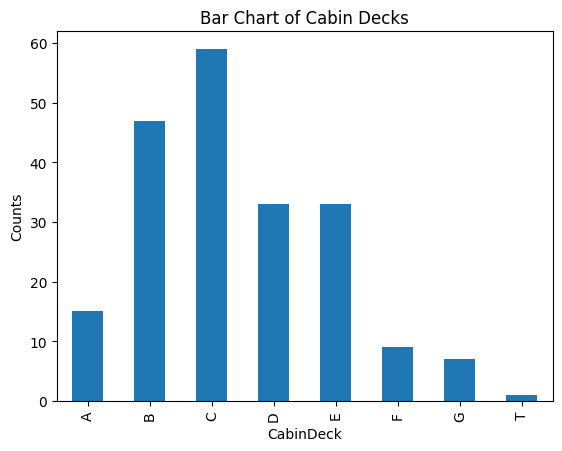

In [11]:
x_colname = 'CabinDeck'

df_group_count = df_.groupby([x_colname])[x_colname].count()
df_group_count.plot.bar(title='Bar Chart of Cabin Decks')
plt.xlabel('CabinDeck')
plt.ylabel('Counts')
plt.show()

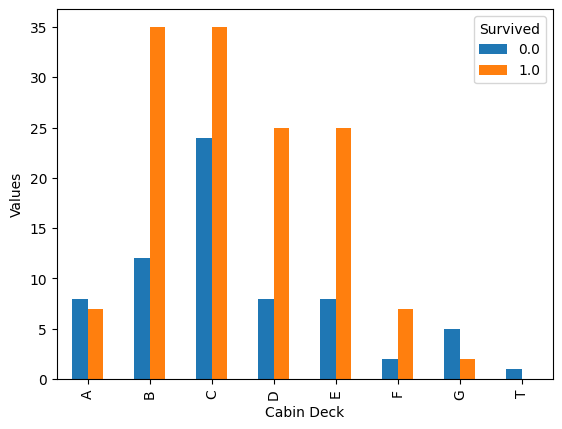

In [12]:
x_colname = 'CabinDeck'
y_colname = 'Survived'

df_group_count = df_.groupby([x_colname, y_colname])[x_colname].count()
df_pclass_grouped = df_group_count.unstack(y_colname)
df_pclass_grouped.plot(kind='bar')
plt.xlabel('Cabin Deck')
plt.ylabel('Values')
plt.show()

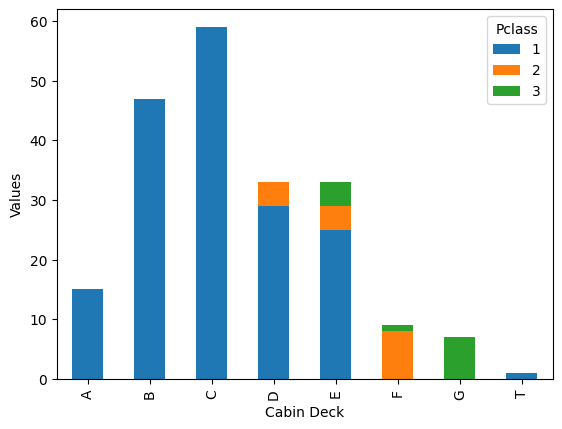

In [13]:
x_colname = 'CabinDeck'
y_colname = 'Pclass'

df_group_count = df_.groupby([x_colname, y_colname])[x_colname].count()
df_pclass_grouped = df_group_count.unstack(y_colname)
df_pclass_grouped.plot(kind='bar', stacked=True)
plt.xlabel('Cabin Deck')
plt.ylabel('Values')
plt.show()